In [89]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [35]:
df=pd.read_csv('adult_with_headers.csv')
df

age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital_gain  capital_loss  hours_per_week  native_country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [37]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [38]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [39]:
df_count=df.drop (df.columns[[1,3,5,6,7,8,9,13,14]],axis=1)
df_count.head()

age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0   39   77516             13          2174             0              40
1   50   83311             13             0             0              13
2   38  215646              9             0             0              40
3   53  234721              7             0             0              40
4   28  338409             13             0             0              40

In [117]:
# prompt: Apply scaling techniques to numerical features like standard scaling and minmax scaling

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assuming df_count is your DataFrame with numerical features

# Standard Scaling
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_count), columns=df_count.columns)

# MinMax Scaling
scaler = MinMaxScaler()
df_minmax = pd.DataFrame(scaler.fit_transform(df_count), columns=df_count.columns)

print("Standard Scaled Data:")
print(df_scaled.head())
print("\nMinMax Scaled Data:")
print(df_minmax.head())


Standard Scaled Data:
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030671 -1.063611       1.134739      0.148453      -0.21666   
1  0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3  1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4 -0.775768  1.408176       1.134739     -0.145920      -0.21666   

   hours_per_week  
0       -0.035429  
1       -2.222153  
2       -0.035429  
3       -0.035429  
4       -0.035429  

MinMax Scaled Data:
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.301370  0.044302       0.800000       0.02174           0.0   
1  0.452055  0.048238       0.800000       0.00000           0.0   
2  0.287671  0.138113       0.533333       0.00000           0.0   
3  0.493151  0.151068       0.400000       0.00000           0.0   
4  0.150685  0.221488       0.800000       0.00000           0.0   

   hours_per_week  

In [118]:
df_cat = df.select_dtypes(include=['object'])
df_cat.head()
for col in df_cat.columns:
  if df_cat[col].nunique() < 5:
    print(col, df_cat[col].unique())
    df_cat = pd.get_dummies(df_cat, columns=[col])
df_cat.head()

sex [' Male' ' Female']
income [' <=50K' ' >50K']


workclass   education       marital_status          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race  native_country  sex_ Female  sex_ Male  \
0   Not-in-family   White   United-States        False       True   
1         Husband   White   United-States        False       True   
2   Not-in-family   White   United-States        False       True   
3         Husband   Black   United-States        False       True   
4            Wife   Black            Cuba         True      False   

   income_ <=50K  income_ >50K  
0           True         False  
1           True         False  
2           True         False  
3           True         False  
4           True         False

In [119]:
# apply label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_cat.columns:
  if df_cat[col].nunique() > 5:
    df_cat[col] = le.fit_transform(df_cat[col])
df_cat.head()

workclass  education  marital_status  occupation  relationship    race  \
0          7          9               4           1             1   White   
1          6          9               2           4             0   White   
2          4         11               0           6             1   White   
3          4          1               2           6             0   Black   
4          4          9               2          10             5   Black   

   native_country  sex_ Female  sex_ Male  income_ <=50K  income_ >50K  
0              39        False       True           True         False  
1              39        False       True           True         False  
2              39        False       True           True         False  
3              39        False       True           True         False  
4               5         True      False           True         False

pros---No Ordinal Relationship Assumption: It does not assume any ordinal relationship among the categories.**

**--Suitable for Algorithms: Works well with algorithms that don't inherently handle categorical data (e.g., Linear Regression, Neural Networks).**

**--Easy to Interpret: Each category is represented by its own feature, making the encoding straightforward to interpret.**

**--Simplicity: Easy to implement and requires fewer features (one feature per categorical column).**

**--Compact Representation: Doesn't increase dimensionality of the dataset, which can be efficient for models that can handle categorical values directly


**Cons:**

**--High Dimensionality: Can lead to a large number of features if the categorical variable has many unique values (high cardinality).**

**--Sparsity: The resulting feature matrix can be sparse, leading to inefficient storage and computation.**

**--Ordinal Relationship Assumption: Assumes an ordinal relationship among categories, which may not be appropriate if the categories are nominal.**

**--Not Suitable for All Algorithms: Some algorithms may misinterpret the numerical values as having an intrinsic order or magnitude

In [194]:
# prompt: find out  two new features by using data

import pandas as pd
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')

df = pd.read_csv('adult_with_headers.csv')

# Numerical Feature Scaling
df_count = df.select_dtypes(include=['int64'])
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_count), columns=df_count.columns)


# Categorical Feature Engineering with Label Encoding and One-Hot Encoding
df_cat = df.select_dtypes(include=['object'])

for col in df_cat.columns:
    if df_cat[col].nunique() < 5 :
        df_cat = pd.get_dummies(df_cat, columns=[col], prefix=col)  # Use prefix for clarity
    else:
      le = LabelEncoder()
      df_cat[col] = le.fit_transform(df_cat[col])

# Feature 1:  PCA for dimensionality reduction on scaled numerical data
pca = PCA(n_components=2) # Reduce to 2 principal components
pca_result = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

print("PCA Result:")
print(df_pca.head())


# Feature 2: Interaction terms between numerical and categorical features
# Example: Interaction between 'age' (numerical) and 'education' (categorical) after label encoding
# Note:  Choose numerical and categorical columns that have a suspected relationship
df_combined = pd.concat([df_scaled, df_cat], axis=1)

df_combined['age_x_education'] = df_combined['age'] * df_combined['education']

print("\nCombined Data with Interaction Term:")
print(df_combined.head())


PCA Result:
        PC1       PC2
0  0.846167 -0.200698
1 -0.097195 -0.903884
2 -0.435844  0.101774
3 -0.480503 -0.325925
4 -0.105086  1.266394

Combined Data with Interaction Term:
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030671 -1.063611       1.134739      0.148453      -0.21666   
1  0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3  1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4 -0.775768  1.408176       1.134739     -0.145920      -0.21666   

   hours_per_week  workclass  education  marital_status  occupation  \
0       -0.035429          7          9               4           1   
1       -2.222153          6          9               2           4   
2       -0.035429          4         11               0           6   
3       -0.035429          4          1               2           6   
4       -0.035429          4          9               

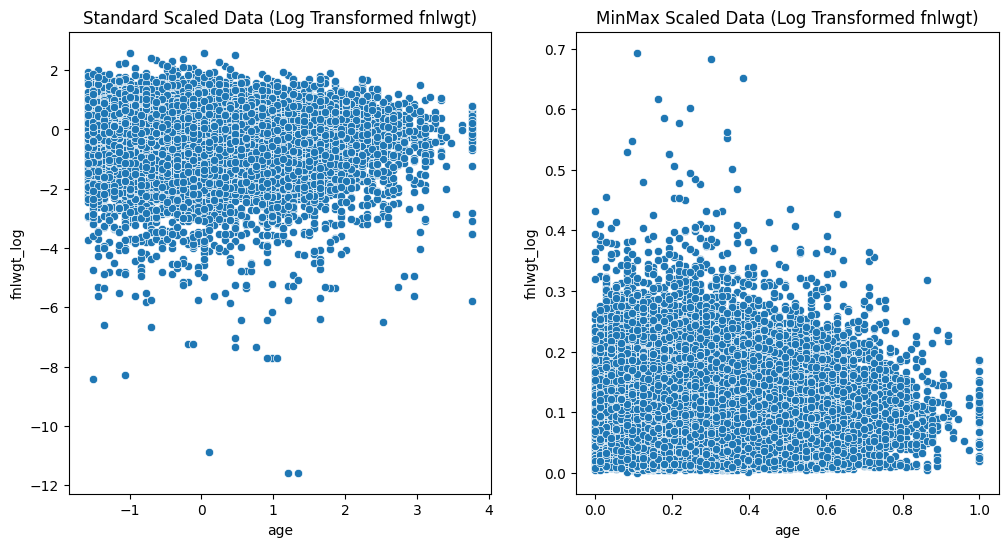

In [195]:
# prompt: use log transformation at lest one skewed numerical features

import numpy as np

# Assuming 'fnlwgt' is a skewed numerical feature
# Apply log transformation to 'fnlwgt'
df_scaled['fnlwgt_log'] = np.log1p(df_scaled['fnlwgt'])
df_minmax['fnlwgt_log'] = np.log1p(df_minmax['fnlwgt'])

# Now you can visualize the transformed feature
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='age', y='fnlwgt_log', data=df_scaled)
plt.title('Standard Scaled Data (Log Transformed fnlwgt)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='age', y='fnlwgt_log', data=df_minmax)
plt.title('MinMax Scaled Data (Log Transformed fnlwgt)')

plt.show()


In [199]:
df

age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital_gain  capital_loss  hours_per_week  native_country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

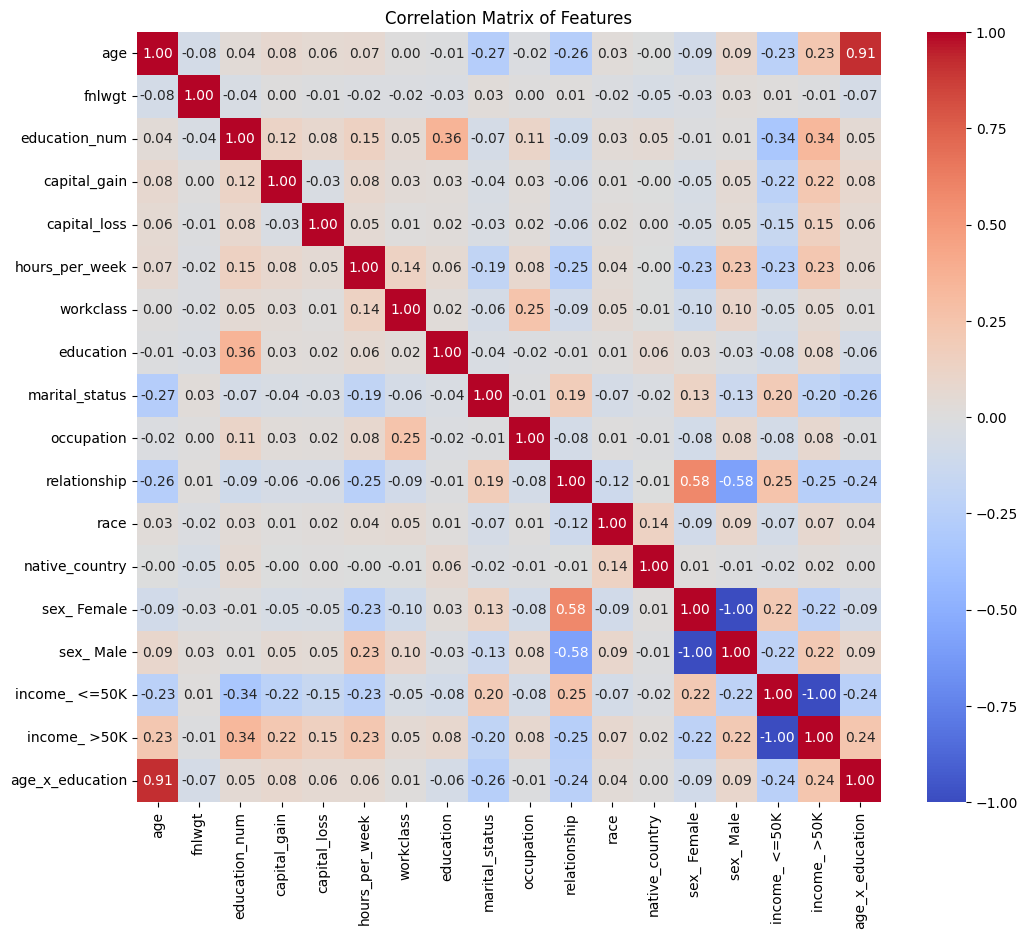

In [200]:
# prompt: display the co relation matrix

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_combined is your final DataFrame with all features
# Calculate the correlation matrix
correlation_matrix = df_combined.corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


**Compare PPS and Correlation:**

**Predictive Power Score**

**- Measures the predictive power of one feature on another.**

**- Considers the relationship between features in a more comprehensive way than correlation, as it captures non-linear relationships.**

**- Provides a score between 0 and 1, where 1 indicates a perfect predictive relationship.**



 **Correlation**
**- Measures the linear relationship between two features.**

**- Only captures linear relationships, and it might miss non-linear dependencies.**

**- Can be misleading when the relationship between features is non-linear.**

Discussion:

Identify Strong Predictive Relationships:

- PPS can help identify features with strong predictive power on the target variable or other features.

- You can focus on features with high PPS scores for model building and feature selection.


